### This notebook will display  climate risk ranking.

    -- Aggregates total and last-year emission per country.

    -- Estimates per-year average and per-capita-like metric.

    -- Creates normalized scores:

        - score_level

        - score_per_capita

        - score_growth

    -- Combines them into climate_risk_index between 0–100.

    -- Sorts countries by risk.

In [1]:
import os, sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.risk_index import run_risk_index
from src.utils import print_section


In [2]:
risk_df = run_risk_index()
risk_df.head(20)



Climate Risk Index

Loading Raw CO2 Dataset
Cleaned columns: ['country', 'code', 'calling_code', 'year', 'co2_emission_tons', 'population2022', 'area', '_of_world', 'densitykm2']
                 country  total_emission  last_emission  first_year  \
210        United States    1.906877e+13   4.170000e+11        1750   
39                 China    4.162896e+12   2.360000e+11        1750   
74               Germany    5.300531e+12   9.263562e+10        1750   
209       United Kingdom    6.162082e+12   7.816115e+10        1750   
163               Russia    4.080739e+12   1.150000e+11        1750   
62               Estonia    6.332375e+10   1.630194e+09        1750   
113           Luxembourg    2.758179e+10   7.536860e+08        1750   
200  Trinidad and Tobago    4.497699e+10   1.569561e+09        1750   
19               Belgium    7.903086e+11   1.254314e+10        1750   
34                Canada    1.255512e+12   3.357674e+10        1750   
160                Qatar    3.334660e+1

,country,total_emission,last_emission,first_year,last_year,population2022,years_span,emission_per_year,emission_per_capita,emission_growth_rate,score_level,score_per_capita,score_growth,climate_risk_index
210,United States,1.906877e+13,4.170000e+11,1750,2020,3.382899e+08,271,7.036446e+10,1232.670715,5.926288,1.000000,1.000000,0.088881,81.777622
39,China,4.162896e+12,2.360000e+11,1750,2020,1.425887e+09,271,1.536124e+10,165.510973,15.363342,0.565947,0.134270,0.347514,39.275733
74,Germany,5.300531e+12,9.263562e+10,1750,2020,8.336984e+07,271,1.955915e+10,1111.140573,4.736177,0.222147,0.901409,0.056265,39.274943
209,United Kingdom,6.162082e+12,7.816115e+10,1750,2020,6.750894e+07,271,2.273831e+10,1157.789624,3.437421,0.187437,0.939253,0.020671,37.962836
163,Russia,4.080739e+12,1.150000e+11,1750,2020,1.447133e+08,271,1.505808e+10,794.674635,7.637098,0.275779,0.644677,0.135768,35.844623
62,Estonia,6.332375e+10,1.630194e+09,1750,2020,1.326062e+06,271,2.336670e+08,1229.349981,6.976571,0.003909,0.997306,0.117665,32.467936
113,Luxembourg,2.758179e+10,7.536860e+08,1750,2020,6.475990e+05,271,1.017778e+08,1163.815826,7.405209,0.001807,0.944142,0.129413,31.002853
200,Trinidad and Tobago,4.497699e+10,1.569561e+09,1750,2020,1.531044e+06,271,1.659667e+08,1025.157423,9.457082,0.003764,0.831656,0.185646,28.850770
19,Belgium,7.903086e+11,1.254314e+10,1750,2020,1.165593e+07,271,2.916268e+09,1076.116824,4.301094,0.030079,0.872996,0.044341,28.580661
34,Canada,1.255512e+12,3.357674e+10,1750,2020,3.845433e+07,271,4.632884e+09,873.159042,7.247482,0.080519,0.708347,0.125090,27.778189


In [4]:
print_section("Top 10 highest risk countries")
risk_df.head(10)



Top 10 highest risk countries


,country,total_emission,last_emission,first_year,last_year,population2022,years_span,emission_per_year,emission_per_capita,emission_growth_rate,score_level,score_per_capita,score_growth,climate_risk_index
210,United States,1.906877e+13,4.170000e+11,1750,2020,3.382899e+08,271,7.036446e+10,1232.670715,5.926288,1.000000,1.000000,0.088881,81.777622
39,China,4.162896e+12,2.360000e+11,1750,2020,1.425887e+09,271,1.536124e+10,165.510973,15.363342,0.565947,0.134270,0.347514,39.275733
74,Germany,5.300531e+12,9.263562e+10,1750,2020,8.336984e+07,271,1.955915e+10,1111.140573,4.736177,0.222147,0.901409,0.056265,39.274943
209,United Kingdom,6.162082e+12,7.816115e+10,1750,2020,6.750894e+07,271,2.273831e+10,1157.789624,3.437421,0.187437,0.939253,0.020671,37.962836
163,Russia,4.080739e+12,1.150000e+11,1750,2020,1.447133e+08,271,1.505808e+10,794.674635,7.637098,0.275779,0.644677,0.135768,35.844623
62,Estonia,6.332375e+10,1.630194e+09,1750,2020,1.326062e+06,271,2.336670e+08,1229.349981,6.976571,0.003909,0.997306,0.117665,32.467936
113,Luxembourg,2.758179e+10,7.536860e+08,1750,2020,6.475990e+05,271,1.017778e+08,1163.815826,7.405209,0.001807,0.944142,0.129413,31.002853
200,Trinidad and Tobago,4.497699e+10,1.569561e+09,1750,2020,1.531044e+06,271,1.659667e+08,1025.157423,9.457082,0.003764,0.831656,0.185646,28.850770
19,Belgium,7.903086e+11,1.254314e+10,1750,2020,1.165593e+07,271,2.916268e+09,1076.116824,4.301094,0.030079,0.872996,0.044341,28.580661
34,Canada,1.255512e+12,3.357674e+10,1750,2020,3.845433e+07,271,4.632884e+09,873.159042,7.247482,0.080519,0.708347,0.125090,27.778189


In [5]:
print_section("Top 10 lowest risk countries")
risk_df.tail(10)


Top 10 lowest risk countries


,country,total_emission,last_emission,first_year,last_year,population2022,years_span,emission_per_year,emission_per_capita,emission_growth_rate,score_level,score_per_capita,score_growth,climate_risk_index
109,Liberia,1.693776e+09,5.251706e+07,1750,2020,5302681.0,271,6.250095e+06,9.903870,8.402603,1.255712e-04,0.008034,0.156747,3.382256
10,Aruba,2.357567e+09,7.592084e+07,1750,2020,NaN,271,8.699510e+06,0.000000,8.727025,1.816954e-04,0.000000,0.165638,3.321851
168,Saint Pierre and Miquelon,1.153209e+08,3.676592e+06,1750,2020,NaN,271,4.255385e+05,0.000000,8.639858,8.447735e-06,0.000000,0.163249,3.265410
218,Zambia,8.811259e+09,2.479878e+08,1750,2020,20017675.0,271,3.251387e+07,12.388443,7.627140,5.943262e-04,0.010050,0.135495,3.041114
51,Czechia,6.045514e+11,1.191774e+10,1750,2020,NaN,271,2.230817e+09,0.000000,5.342321,2.857935e-02,0.000000,0.072877,2.886505
52,Democratic Republic of Congo,7.464739e+09,1.931839e+08,1750,2020,NaN,271,2.754516e+07,0.000000,7.013350,4.629018e-04,0.000000,0.118673,2.396610
40,Christmas Island,5.913696e+07,1.330032e+06,1750,2020,NaN,271,2.182176e+05,0.000000,6.094981,2.820490e-06,0.000000,0.093504,1.870228
49,Curacao,2.561368e+10,5.592927e+08,1750,2020,NaN,271,9.451541e+07,0.000000,5.917476,1.340861e-03,0.000000,0.088640,1.839836
178,Sint Maarten (Dutch part),3.057584e+09,6.770353e+07,1750,2020,NaN,271,1.128260e+07,0.000000,6.000704,1.619896e-04,0.000000,0.090921,1.826511
159,Puerto Rico,2.109365e+07,2.088480e+05,1750,2020,3252407.0,271,7.783634e+04,0.064213,2.683168,1.317986e-07,0.000052,0.000000,0.001569


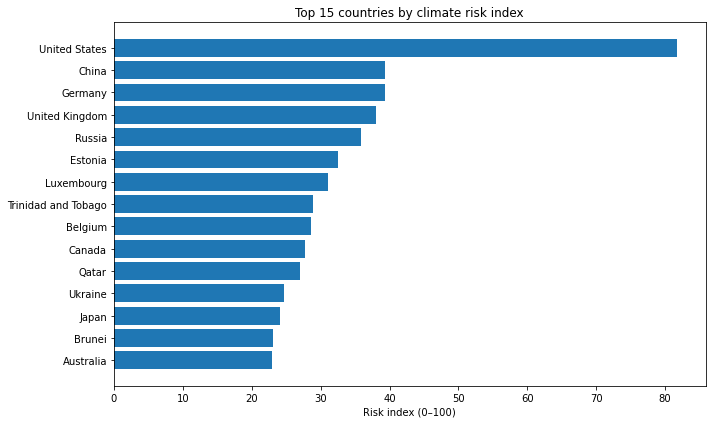

In [6]:
import matplotlib.pyplot as plt

top_n = 15
top = risk_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top["country"][::-1], top["climate_risk_index"][::-1])
plt.title(f"Top {top_n} countries by climate risk index")
plt.xlabel("Climate risk index (0–100, unitless)")
plt.tight_layout()
plt.show()
